In [52]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import linalg
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import mean_squared_error
from seaborn import heatmap as hmap
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import normalize
from sklearn import svm
from PRML_functions import prml        #Module with manually written prml functions
from seaborn import heatmap as h_map
import os
# Group_No_5

In [ ]:
######################################## Dataset 1 ###########################################################

Text(0.5, 1.0, 'Scatter plot of Dataset 1 Team 5')

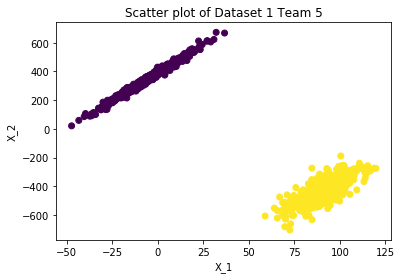

In [53]:
#Loading DataSet 1
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_1')
my_data = np.genfromtxt('Dataset_1_Team_5.csv', delimiter=',')

X = my_data[:,:-1]
y = my_data[:,-1]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size = 0.8)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,train_size = 0.5)

#For decision boundary
h=1
x_min, x_max = X[:, 0].min() - 4*h, X[:, 0].max() + 4*h
y_min, y_max = X[:, 1].min() - 6*4*h, X[:, 1].max() + 6*4*h
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, 4*h))

#Scatter plot for Dataset 1
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter plot of Dataset 1 Team 5')

In [ ]:
######################################## DataSet 1: Perceptron Algorithm ################################################

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

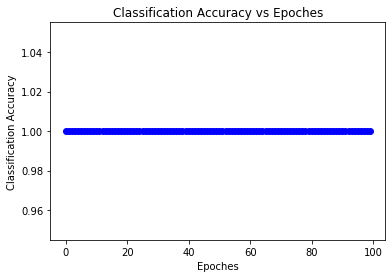

In [54]:
# To fine tune percecptron parameters: linear kernel
lin_perceptron = prml(X_train,y_train)
lin_perceptron.kernel_perceptron(T = 100,view =True) #Returns alpha,no_of_mistakes,theoratical mistake bound,rho,w_norm,r

Text(0.5, 1.0, 'Learning curve for linear kernel perceptron classification')

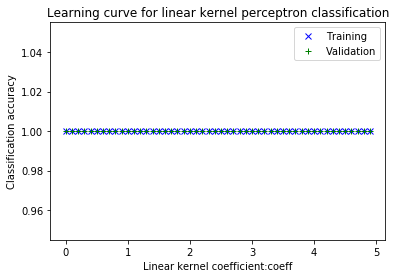

In [55]:
## Try out learning curve for choosing different parameters for linear kernel: percecptron algorithm,dataset1
lin_perceptron = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,5,0.1)
for c in c_values:
    lin_perceptron.kernel_perceptron(coeff= c, T = 1)
    val_accuracy.append(acc_score(y_val,lin_perceptron.predict(X_val)))
    train_accuracy.append(acc_score(y_train,lin_perceptron.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel coefficient:coeff')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel perceptron classification')

Train Accuracy for linear kernel: 1.0
Validation Accuracy for linear kernel: 1.0
Test Accuracy for linear kernel: 1.0


Text(0.5, 1.0, 'Decision boundary for linear kernel perceptron')

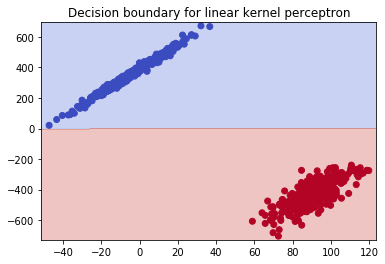

In [86]:
#### Get Train,Test and Validation error for linear kernel perceptron , dataset 1
## Choosen parameters: Default parameters with T = 1
lin_perceptron.kernel_perceptron(T = 1)
train_acc = acc_score(y_train,lin_perceptron.predict(X_train))
val_acc = acc_score(y_val,lin_perceptron.predict(X_val))
test_acc = acc_score(y_test,lin_perceptron.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function for linear kernel perceptron
z_linear = lin_perceptron.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Decision boundary for linear kernel perceptron')

(array([6.000e+00, 1.000e+00, 1.000e+00, 2.980e+02, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.900e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+02,
        1.470e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.720e+02, 0.000e+00, 0.000e+00, 1.490e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.850e+02, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.950e+0

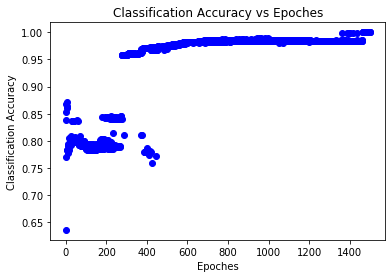

In [81]:
# To fine tune percecptron parameters: polynomial kernel , dataset 1
poly_perceptron = prml(X_train,y_train)
poly_perceptron.kernel_perceptron(degree = 2,coeff = 0.0,T = 1500,view =True) #Returns alpha,no_of_mistakes,theoratical mistake bound,rho,w_norm,r

Text(0.5, 1.0, 'Learning curve for polynomial kernel perceptron classification')

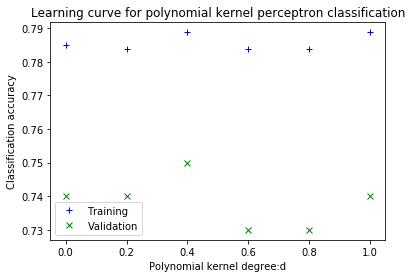

In [62]:
## Try out learning curve for choosing different parameters for polynomial kernel: percecptron algorithm, dataset 1
poly_perceptron = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,5,1)
for c in c_values:
    poly_perceptron.kernel_perceptron(degree= c)
    val_accuracy.append(acc_score(y_val,poly_perceptron.predict(X_val)))
    train_accuracy.append(acc_score(y_train,poly_perceptron.predict(X_train)))
plt.plot(c_values,train_accuracy,'b+',c_values,val_accuracy,'gx')
plt.xlabel('Polynomial kernel degree:d')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel perceptron classification')

Train Accuracy for polynomial kernel: 1.0
Validation Accuracy for polynomial kernel: 1.0
Test Accuracy for polynomial kernel: 1.0


Text(0.5, 1.0, 'Decision boundary for polynomial kernel perceptron:degree:3')

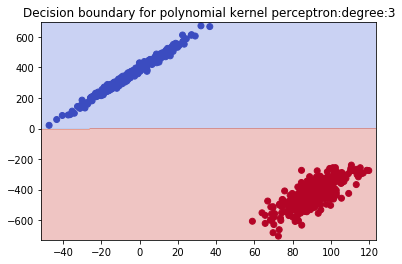

In [88]:
#### Get Train,Test and Validation error for polynomial kernel perceptron, dataset1
## Choosen parameters: degree =3 anad T=1 (For comparison we will also use degree = 2 and T = 1500)
d = 3
poly_perceptron.kernel_perceptron(degree = d,T=1,coeff = 0.0)
train_acc = acc_score(y_train,poly_perceptron.predict(X_train))
val_acc = acc_score(y_val,poly_perceptron.predict(X_val))
test_acc = acc_score(y_test,poly_perceptron.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)

#Scatter plot with decision function for polynomial kernel perceptron
z_poly = poly_perceptron.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Decision boundary for polynomial kernel perceptron:degree:%s'%str(d))

In [ ]:
############################################# DataSet 1: Hard Margin SVM #################################################

Text(0.5, 1.0, 'Learning curve for linear kernel svm classifier')

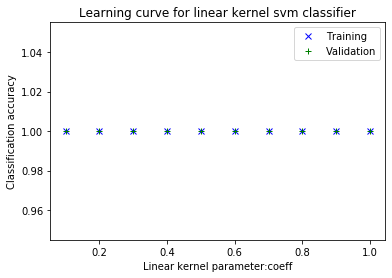

In [71]:
## Try out learning curve for choosing different parameters for linear kernel: Hard Margin SVM, dataset1
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0.1,1.1,0.1)
for c in c_values:
    clf_linear = svm.SVC(C = 1e10,kernel='linear',coef0 = c,max_iter = 1000) # Change both the parameters
    clf_linear.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_linear.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_linear.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel parameter:coeff')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel svm classifier')

Train Accuracy for linear kernel: 1.0
Validation Accuracy for linear kernel: 1.0
Test Accuracy for linear kernel: 1.0


Text(0.5, 1.0, 'Decision boundary for hard margin linear kernel svm')

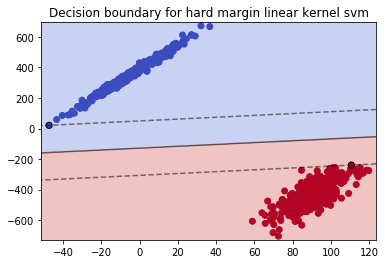

In [85]:
#### Get Train,Test and Validation error for linear kernel : Hard Margin SVM ,dataset 1
## Choosen parameters: Default parameters
clf_linear = svm.SVC(kernel='linear',C = 1e10,max_iter = 1000)
clf_linear.fit(X_train,y_train)
sv_linear = clf_linear.support_vectors_
train_acc = acc_score(y_train,clf_linear.predict(X_train))
val_acc = acc_score(y_val,clf_linear.predict(X_val))
test_acc = acc_score(y_test,clf_linear.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)
#Scatter plot with decision function for linear kernel
z_linear = clf_linear.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_linear = clf_linear.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for hard margin linear kernel svm')

Text(0.5, 1.0, 'Learning curve for polynomial kernel svm classifier')

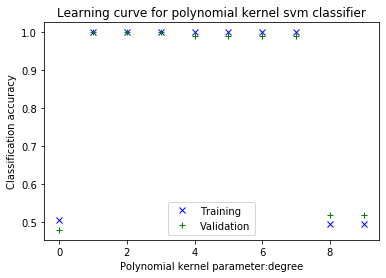

In [75]:
## Try out learning curve for choosing different parameters for polynomial kernel: Hard Margin SVM, dataset1
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,10,1)
for c in c_values:
    clf_poly = svm.SVC(kernel='poly',degree= c,gamma = 1,C = 1e10,max_iter=1000) # Change both the parameters
    clf_poly.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_poly.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_poly.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Polynomial kernel parameter:degree')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel svm classifier')

Train Accuracy for polynomial kernel: 1.0
Validation Accuracy for polynomial kernel: 1.0
Test Accuracy for polynomial kernel: 1.0


Text(0.5, 1.0, 'Decision boundary for hard margin polynomial kernel svm: degree 3')

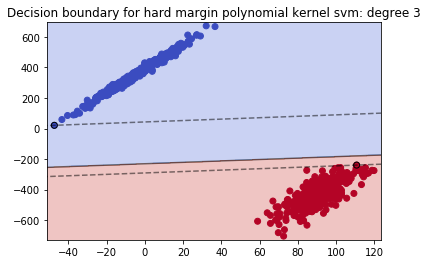

In [89]:
#### Get Train,Test and Validation error for polynomial kernel : Hard Margin SVM ,dataset 1
## Choosen parameters:degree =3 (For comparison we will also use degree = 2)
d = 3
clf_poly = svm.SVC(kernel='poly',degree=d,gamma = 1.0,C =1e10,max_iter = 1000)
clf_poly.fit(X_train,y_train)
sv_poly = clf_poly.support_vectors_
train_acc = acc_score(y_train,clf_poly.predict(X_train))
val_acc = acc_score(y_val,clf_poly.predict(X_val))
test_acc = acc_score(y_test,clf_poly.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)

#Scatter plot with decision function for linear kernel
z_poly = clf_poly.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf_poly.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_poly[:, 0], sv_poly[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for hard margin polynomial kernel svm: degree %s'%str(d))

In [ ]:
############################################# Dataset 3 ########################################################

Text(0.5, 1.0, 'Scatter plot of Dataset 3 Team 5')

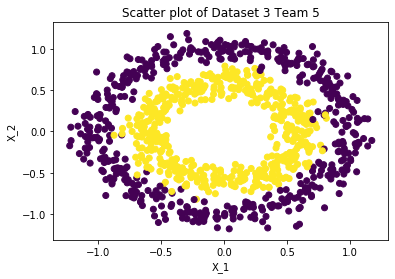

In [90]:
#Loading DataSet 3
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_3')
my_data = np.genfromtxt('Dataset_3_Team_5.csv', delimiter=',')

X = my_data[:,:-1]
y = my_data[:,-1]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size = 0.8)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,train_size = 0.5)

#For decision boundary
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

#Scatter plot: DataSet3
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter plot of Dataset 3 Team 5')

In [ ]:
################################# DataSet 3: Perceptron ALgorithm ##################################################

(array([  1.,   0.,   0., 100.,   7.,  74.,  40.,   0.,  60., 100.,  91.,
        100.,   0.,  92.,   0.,  98., 100., 100.,  51.,  91.,  54.,   0.,
          8.,   0., 100.,   0.,  26.,   0.,  26., 100., 100.,  26.,   0.,
         99.,  73.,  18.,  18.,  82.,   0.,  85.,  98.,  61., 100.,   5.,
         67.,   1.,  99., 100.,  79.,   6.,  13.,   0.,   0., 100.,   0.,
         65.,  33.,   0.,  86.,  86.,  14.,  14.,   6., 100.,   0., 100.,
          0., 100.,   0.,  63.,   0.,   0., 100.,  43.,   0.,  98.,  92.,
          0.,   0.,   6., 100.,   0.,  98.,   0.,   0.,  77.,   0.,   0.,
         86.,  23.,   0., 100.,   0.,  16., 100.,  29.,  18.,   0.,  49.,
         67.,   0.,  88.,  57.,   0., 100.,   0.,  98.,   0.,  28.,   0.,
         12.,   0., 100.,  73.,   0., 100.,  98.,  92.,   0.,   0.,   7.,
        100.,  99.,  95.,   0., 100.,   0.,  84., 100.,  39.,   1.,   0.,
        100.,  21., 100.,  99.,  74.,   3., 100.,  87., 100.,  90., 100.,
         61.,  87.,  26., 100.,   0., 

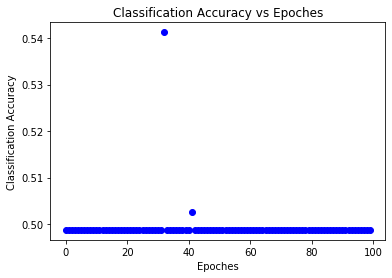

In [92]:
# To fine tune percecptron parameters: linear kernel,dataset3
lin_perceptron = prml(X_train,y_train)
lin_perceptron.kernel_perceptron(view =True,T=100)

Text(0.5, 1.0, 'Learning curve for linear kernel perceptron classification')

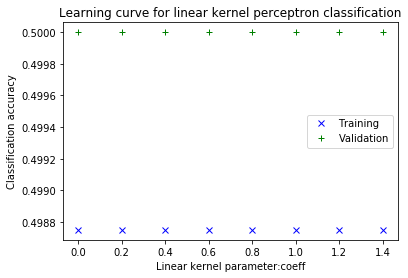

In [93]:
## Try out learning curve for choosing different parameters for linear kernel: perceptron algorithm , dataset3
lin_perceptron = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,1.6,0.2)
for c in c_values:
    lin_perceptron.kernel_perceptron(coeff= c)
    val_accuracy.append(acc_score(y_val,lin_perceptron.predict(X_val)))
    train_accuracy.append(acc_score(y_train,lin_perceptron.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel parameter:coeff')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel perceptron classification')

Train Accuracy for linear kernel: 0.49875
Validation Accuracy for linear kernel: 0.5
Test Accuracy for linear kernel: 0.51


Text(0.5, 1.0, 'Decision boundary for linear kernel perceptron')

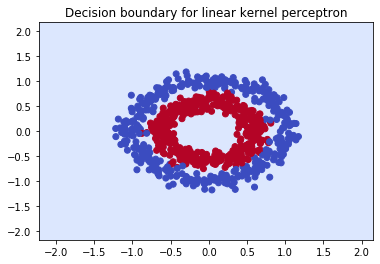

In [105]:
#### Get Train,Test and Validation error for linear kernel : Perceptron Algorithm ,dataset 3
## Choosen parameters: Default parameters
lin_perceptron.kernel_perceptron()
train_acc = acc_score(y_train,lin_perceptron.predict(X_train))
val_acc = acc_score(y_val,lin_perceptron.predict(X_val))
test_acc = acc_score(y_test,lin_perceptron.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)
#Scatter plot with decision function for linear kernel
z_linear = lin_perceptron.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Decision boundary for linear kernel perceptron')

(array([   1.,    0.,    0.,    1.,   34.,    1.,    1.,    0.,    1.,
           1.,    4.,    0.,    0.,    0.,   33.,    0.,    1.,    1.,
          14.,    1.,    1.,    1.,    1.,    1.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    0.,   31.,  194.,    0.,    0.,
           0.,  964.,    0.,    3.,    0.,    0.,   10.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    2.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  907.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           2.,    0.,    0.,    0.,  291.,    3.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  279.,    0.,    0.,
      

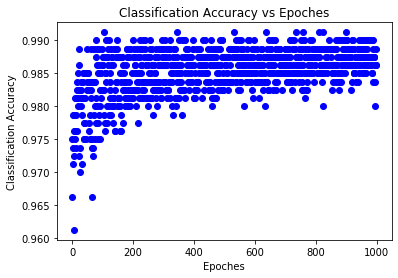

In [121]:
# To fine tune percecptron parameters: polynomial kernel,dataset3
poly_perceptron = prml(X_train,y_train)
poly_perceptron.kernel_perceptron(degree = 6,view =True,T=1000)

(array([   1.,    0.,    0.,    1.,   14.,    1.,    1.,    0.,    1.,
           1.,    1.,    0.,    0.,    0.,    8.,    0.,    1.,    1.,
           9.,    1.,    1.,    1.,    1.,    1.,    0.,    0.,    1.,
           1.,    0.,    0.,    1.,    1.,   20.,  225.,    0.,    0.,
           0.,  968.,    1.,    3.,    0.,    1.,   10.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    1.,    3.,  896.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,    1.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    0.,    0.,    1.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,  211.,    2.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,  222.,    0.,    0.,
      

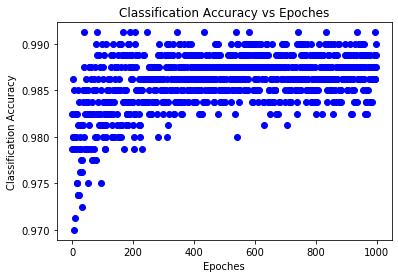

In [122]:
# To fine tune percecptron parameters: polynomial kernel,dataset3
poly_perceptron = prml(X_train,y_train)
poly_perceptron.kernel_perceptron(degree = 7,view =True,T=1000)

Text(0.5, 1.0, 'Learning curve for polynomial kernel perceptron classification')

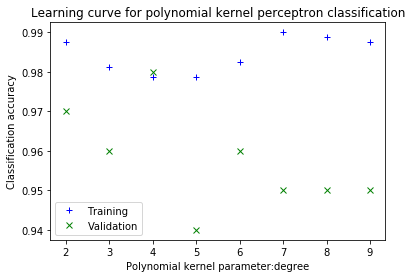

In [99]:
## Try out learning curve for choosing different parameters for polynomial kernel: percecptron algorithm, dataset3
poly_perceptron = prml(X_train,y_train)
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(2,10,1)
for c in c_values:
    poly_perceptron.kernel_perceptron(degree= c)
    val_accuracy.append(acc_score(y_val,poly_perceptron.predict(X_val)))
    train_accuracy.append(acc_score(y_train,poly_perceptron.predict(X_train)))

plt.plot(c_values,train_accuracy,'b+',c_values,val_accuracy,'gx')
plt.xlabel('Polynomial kernel parameter:degree')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel perceptron classification')

Train Accuracy for polynomial kernel: 0.99
Validation Accuracy for polynomial kernel: 0.95
Test Accuracy for polynomial kernel: 0.99


Text(0.5, 1.0, 'Decision boundary for polynomial kernel perceptron:degree:7')

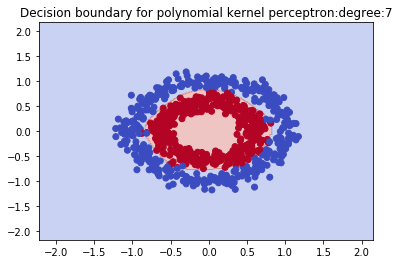

In [120]:
#### Get Train,Test and Validation error for polynomial kernel : Perceptron Algorithm ,dataset 3
## Choosen parameters: T = 100 for degree = 2,3,6,7 (other degrees for purpose of comparison with svm)
d = 7
poly_perceptron.kernel_perceptron(T = 100,degree = d)#,b=1,gamma =1.5)
train_acc = acc_score(y_train,poly_perceptron.predict(X_train))
val_acc = acc_score(y_val,poly_perceptron.predict(X_val))
test_acc = acc_score(y_test,poly_perceptron.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)

#Scatter plot with decision function for polynomial kernel
z_poly = poly_perceptron.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.title('Decision boundary for polynomial kernel perceptron:degree:%s'%str(d))

In [ ]:
#################################### DataSet3: Hard Margin SVM ################################################

Text(0.5, 1.0, 'Learning curve for linear kernel svm classifier')

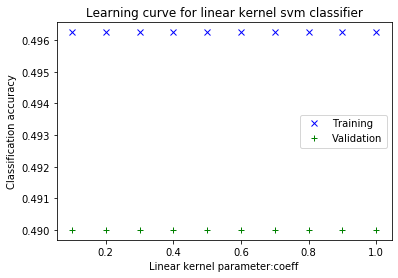

In [102]:
## Try out learning curve for choosing different parameters for linear kernel: Hard Margin SVM, dataset3
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0.1,1.1,0.1)
for c in c_values:
    clf_linear = svm.SVC(C = 1e10,kernel='linear',coef0 = c,max_iter=1000) ##If max_iter is not initialized than it will run forever
    clf_linear.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_linear.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_linear.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Linear kernel parameter:coeff')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for linear kernel svm classifier')

Train Accuracy for linear kernel: 0.49625
Validation Accuracy for linear kernel: 0.49
Test Accuracy for linear kernel: 0.5


Text(0.5, 1.0, 'Decision boundary for linear kernel hard margin svm')

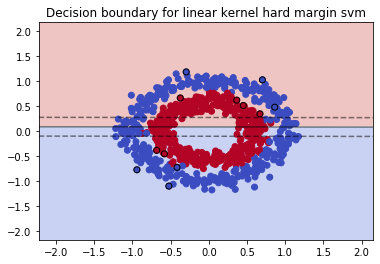

In [112]:
## Get Train,Test and Validation error for linear kernel : Hard Margin SVM ,dataset 3
## Choosen parameters:
clf_linear = svm.SVC(kernel='linear',C = 1e10,max_iter=1000) ##If max_iter is not initialized than it will run forever
clf_linear.fit(X_train,y_train)
sv_linear = clf_linear.support_vectors_
train_acc = acc_score(y_train,clf_linear.predict(X_train))
val_acc = acc_score(y_val,clf_linear.predict(X_val))
test_acc = acc_score(y_test,clf_linear.predict(X_test))
print('Train Accuracy for linear kernel:',train_acc)
print('Validation Accuracy for linear kernel:',val_acc)
print('Test Accuracy for linear kernel:',test_acc)

#Scatter plot with decision function for linear kernel
z_linear = clf_linear.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_linear = clf_linear.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_linear,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_linear, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for linear kernel hard margin svm')

Text(0.5, 1.0, 'Learning curve for polynomial kernel svm classifier')

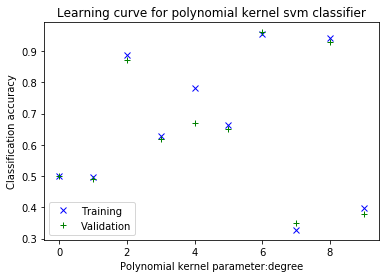

In [113]:
## Try out learning curve for choosing different parameters for polynomial kernel: Hard Margin SVM, dataset3
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0,10,1)
for c in c_values:
    clf_poly = svm.SVC(kernel='poly',degree= c,gamma = 1,C = 1e10,max_iter=1000)
    clf_poly.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf_poly.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf_poly.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Polynomial kernel parameter:degree')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel svm classifier')

Train Accuracy for polynomial kernel: 0.3275
Validation Accuracy for polynomial kernel: 0.35
Test Accuracy for polynomial kernel: 0.3


Text(0.5, 1.0, 'Decision boundary for hard margin polynomial kernel svm: degree 7')

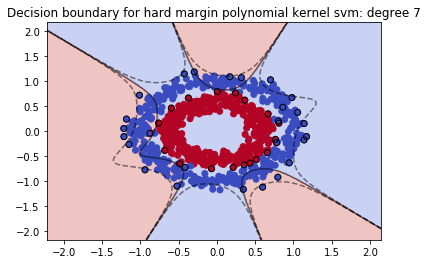

In [118]:
## Get Train,Test and Validation error for polynomial kernel : Hard Margin SVM ,dataset 3
## Choosen parameters: Default parameters with degrees 2,3,6,7 (To see the variation of accuracy for odd and even degrees)
d = 7
clf_poly = svm.SVC(kernel='poly',degree=d,C =1e10,max_iter = 1000) ##If max_iter is not initialized than it will run forever
clf_poly.fit(X_train,y_train)
sv_poly = clf_poly.support_vectors_
train_acc = acc_score(y_train,clf_poly.predict(X_train))
val_acc = acc_score(y_val,clf_poly.predict(X_val))
test_acc = acc_score(y_test,clf_poly.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)

#Scatter plot with decision function for linear kernel
z_poly = clf_poly.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf_poly.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_poly[:, 0], sv_poly[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for hard margin polynomial kernel svm: degree %s'%str(d))